In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime
import math 

In [2]:
df_info = pd.read_csv('colect_data\colect_data\clean_data.csv')
df_info.drop(df_info[df_info['Price(Triệu/tháng)'] > 100].index, inplace = True)
df_info.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.50,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,723089,"Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay tr...",6.00,70.0,Quận 4,Hồ Chí Minh,21/11/2018
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,17/10/2018
3,745037,Cho nam thuê phòng (ghép) tại quận 10. Nhà ở t...,1.45,8.0,Quận 10,Hồ Chí Minh,03/10/2018
4,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.00,15.0,Quận 10,Hồ Chí Minh,05/10/2018


In [3]:
giờ t có giá/m2 của một bài đăng
giá trung bình của quận
giá tốt nhất


SyntaxError: invalid syntax (3882965369.py, line 1)

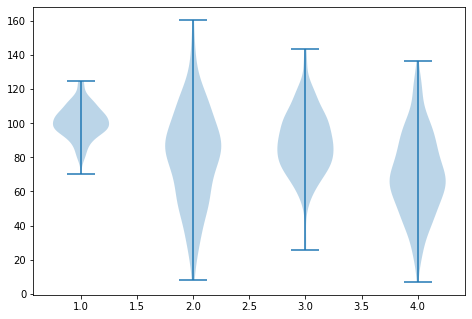

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

QUAN:  <class 'numpy.ndarray'>
Tìm:  0.17222222222222222
Quận 3
Giá trung bình:  0.17226595744680853
Giá phù hợp:  0.17222222222222222
*Thông tin* 
ID:  1467344
Tiêu đề:  Chính chủ cho thuê phòng tiện nghi, sạch sẽ tại Trần Văn Đang, TP HCM.
Giá (triệu/tháng):  3.1
Diện tích:  18.0
Ngày đăng:  2019-07-24 00:00:00
 
Quận 4
Giá trung bình:  0.12224287484510535
Giá phù hợp:  0.12
*Thông tin* 
ID:  1603527
Tiêu đề:  Cho thuê phòng đường Tôn Thất Thuyết, quận 4, điện nước giá nhà nước
Giá (triệu/tháng):  2.4
Diện tích:  20.0
Ngày đăng:  2020-07-20 00:00:00
 
Quận 7
Giá trung bình:  0.14527761485826
Giá phù hợp:  0.145
*Thông tin* 
ID:  1445056
Tiêu đề:  Cho thuê trọ Quận 7 phí sau chợ Tân Mỹ, diện tích 20m2
Giá (triệu/tháng):  2.9
Diện tích:  20.0
Ngày đăng:  2019-04-01 00:00:00
 
Quận 10
Giá trung bình:  0.15601425847633257
Giá phù hợp:  0.15625
*Thông tin* 
ID:  1646179
Tiêu đề:  Phòng đẹp mới sửa cho thuê trung tâm Q.10, xách đồ vào ở ngay
Giá (triệu/tháng):  5.0
Diện tích:  32.0
Ngày đă

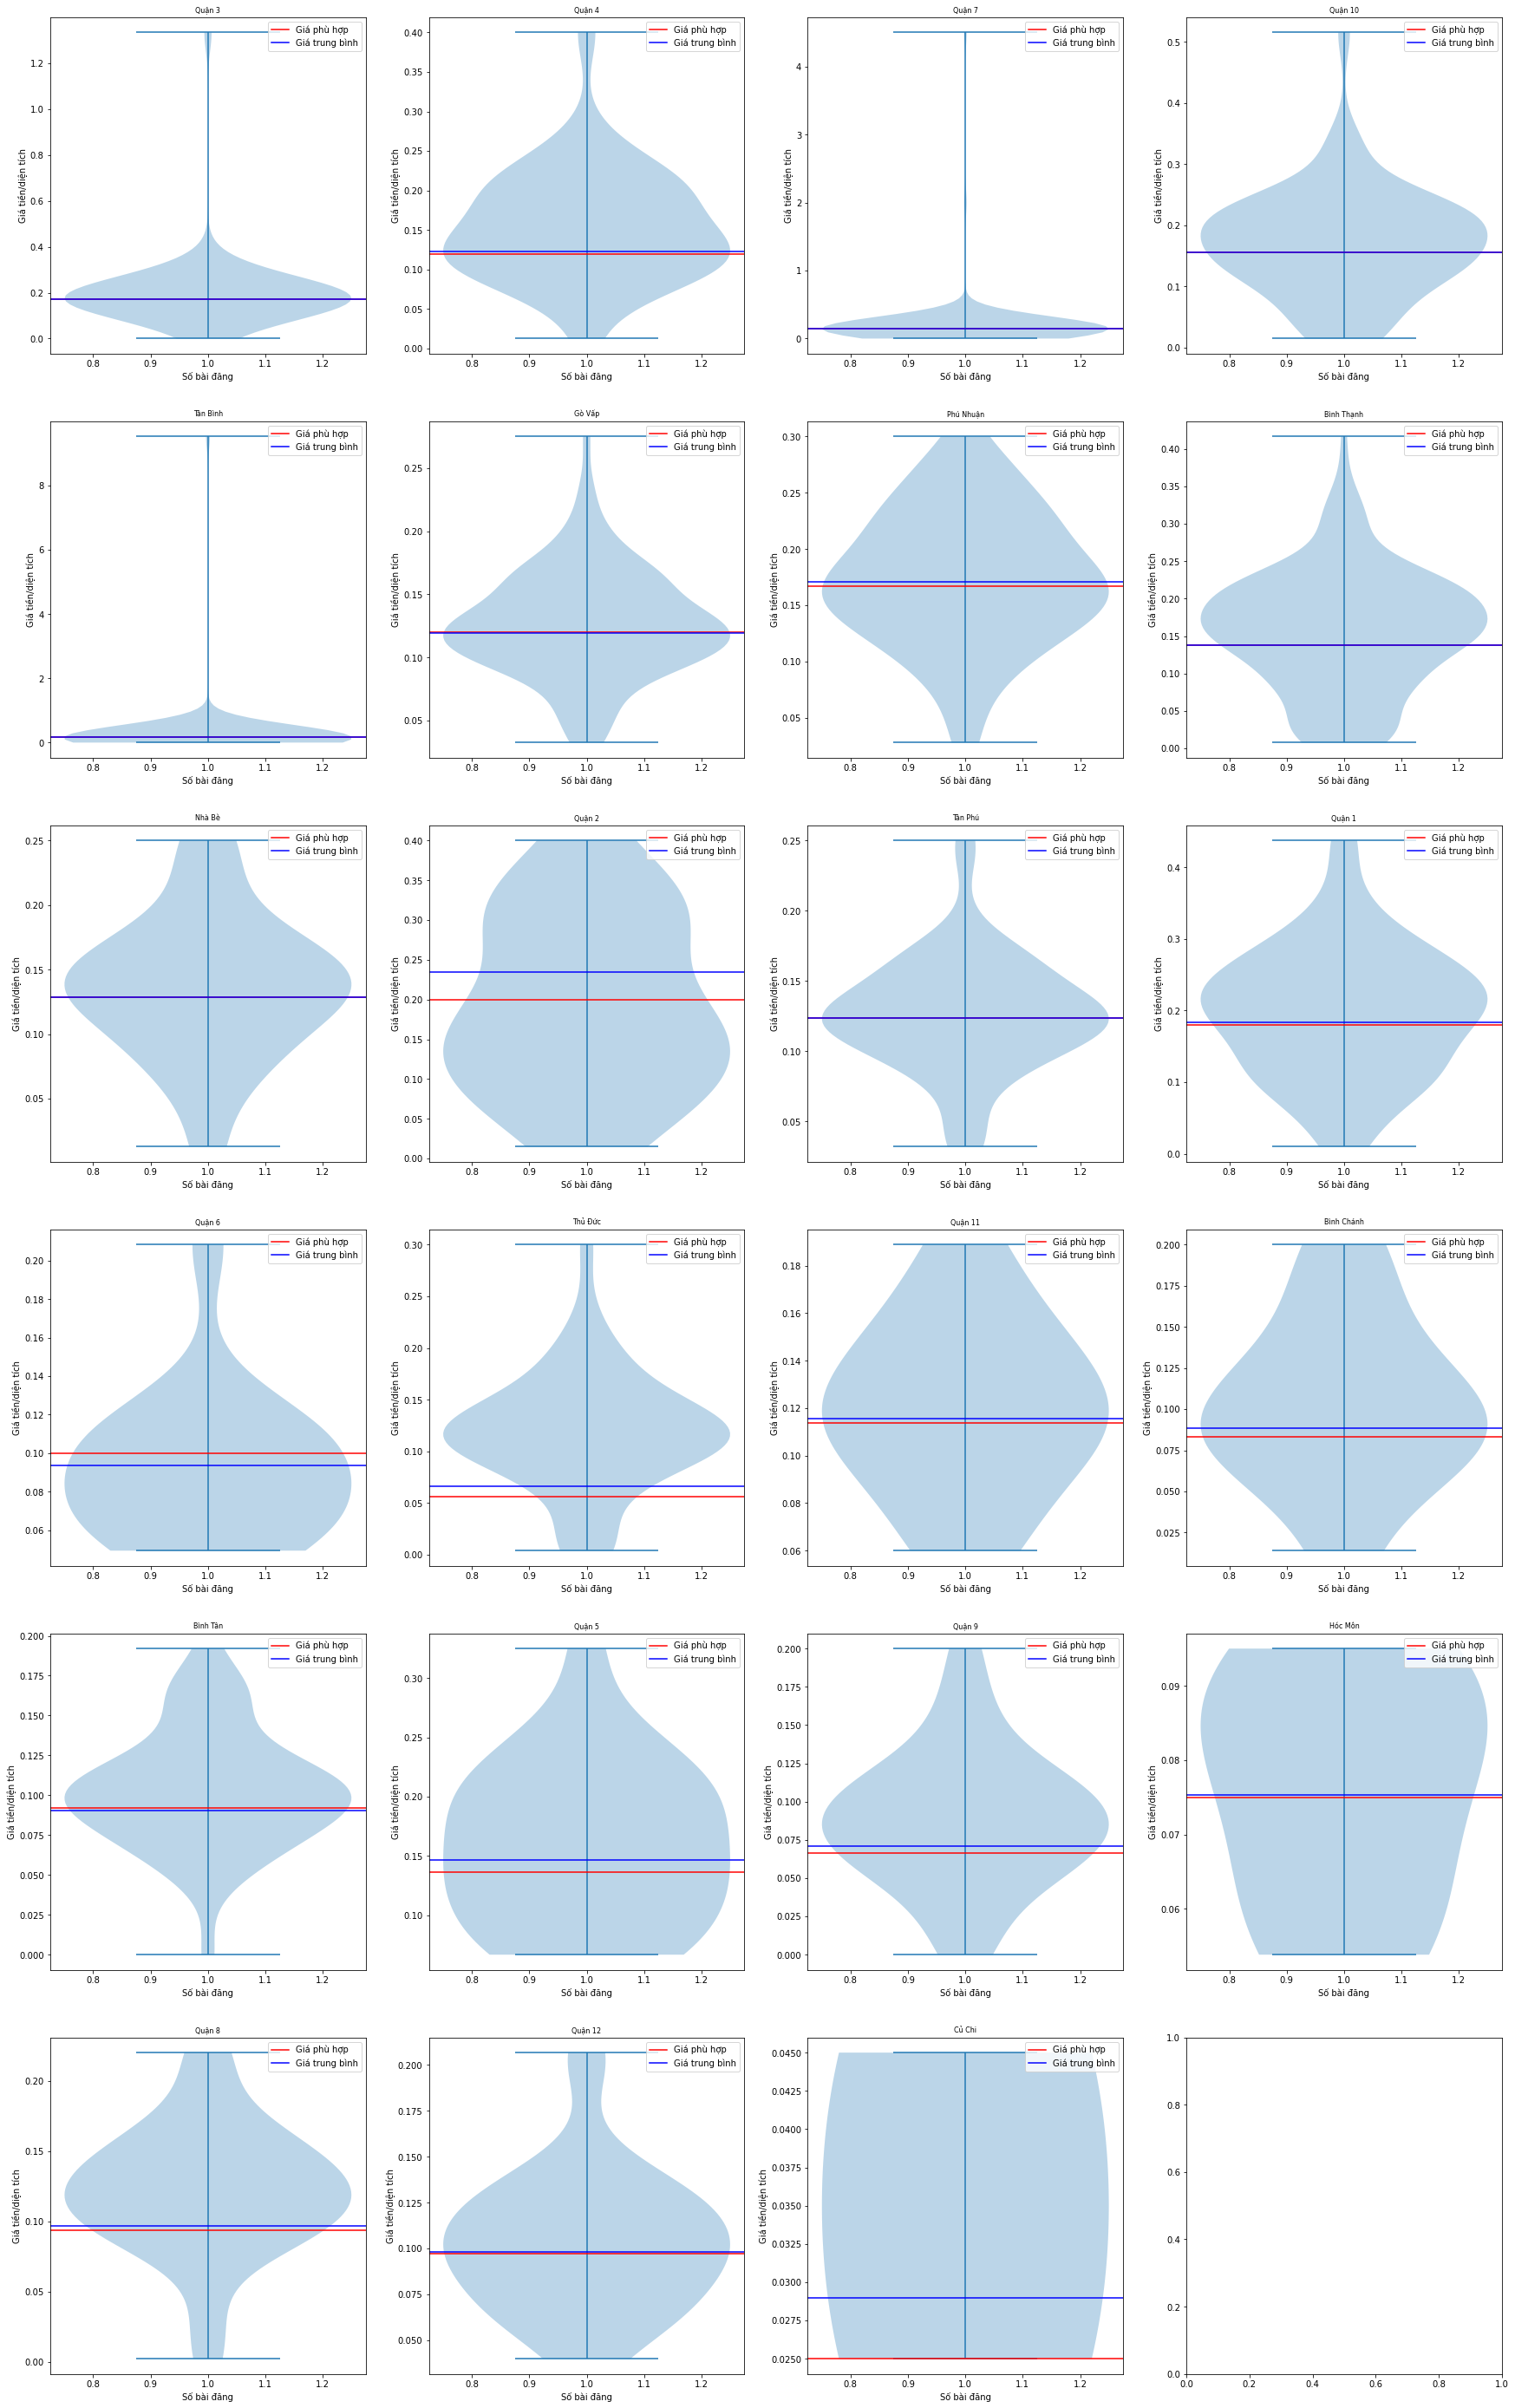

In [112]:
quan = pd.unique(df_info.District)
print ("QUAN: ",type (quan))
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y ",errors = 'coerce')

array = {}
process = df_info.dropna()
# Get today
today = date.today()

today = np.datetime64(today)
#Xét theo quận

for i in quan:
    arr = {}
    district = process[process['District'] == i]
    price = district['Price(Triệu/tháng)']
    priceMedium = price.sum()/len(process[process['District'] == i]['Price(Triệu/tháng)'])
    square =  district['Square(m²)']
    squareMedium = square.sum()/len(process[process['District'] == i]['Price(Triệu/tháng)'])
    # Giá trung bình
    Medimum = priceMedium/squareMedium
    
    first = district.values[0]
    first = first[2]/first[3]
    
    min = float (abs(first-Medimum))
    
    Get = district.head(1).values
    #Lưu price/square của một bài đăng
    each = []
    #choose price
    choosePrice = first
    for j in district.values:
        checkDate = pd.to_datetime(j[6],format = "%d/%m/%Y ",errors = 'coerce')
        count = today - checkDate
        if (count.days < 1000000):
            if (len(j) != 7):
                print (j)
            if pd.notna(j[2]) & pd.notna(j[3]):
                #giá một bài
                cal =  j[2]/j[3]
                
                if (cal != 0):
                    each.append(cal)
                    cal = float (cal)
                    find = float(abs(cal-Medimum))
                    if find <= float(min):
                        choosePrice = cal
                        min = find
                        Get = j
                        
                    
    arr['Price'] = priceMedium
    arr['Square'] = squareMedium
    arr['Price/square medium'] = priceMedium/squareMedium
    arr['Price/square'] = each
    arr['Choosen inf'] = Get
    arr['Choosen Price/square'] = float(choosePrice)

    array[i] = arr

#Tạo biểu đồ

lenarray =  len(array) +1 
if (lenarray % 2 != 0 ):
    lenarray = lenarray +1
lenarray = int (math.sqrt(lenarray))
fig ,axis = plt.subplots(6,4,figsize =(30, 50))
run = 0  
for i in range(0,6 ):
    for j in range(0,4 ):
        if run != len(quan) :
            axis[i][j].violinplot([array[quan[run]]["Price/square"],])
            axis[i][j].set_xlabel("Số bài đăng")
            axis[i][j].set_ylabel("Giá tiền/diện tích")
            axis[i][j].set_title(quan[run], fontsize = 8)
            x = array[quan[run]]['Choosen Price/square']
            x1 = array[quan[run]]['Price/square medium']
            axis[i][j].axhline(y = x, color = 'r', linestyle = '-',label ='Giá phù hợp')
            axis[i][j].axhline(y = x1, color = 'b', linestyle = '-',label ='Giá trung bình')
            axis[i][j].legend()
            run += 1

#Test
# print ("Test: ", process[process['District'] == "Quận 3"].values[1][2])

# for j in array:
#     print (array[j]["Price/square"])
print ("Tìm: ",array[quan[0]]["Choosen Price/square"])

# Data
for j in array:
    # print (set(array[j]["Choosen inf"]))
    if (type(array[j]["Choosen inf"])!= float):
        print("================================== ")
        print (j)
        print("Giá trung bình: ", array[j]["Price/square medium"])
        print("Giá phù hợp: ", array[j]["Choosen Price/square"])
        print("*Thông tin* ")
        print("ID: ", array[j]["Choosen inf"][0])
        print("Tiêu đề: ", array[j]["Choosen inf"][1])
        print ("Giá (triệu/tháng): ", array[j]["Choosen inf"][2] )
        print ("Diện tích: ", array[j]["Choosen inf"][3]) 
        print ('Ngày đăng: ', array[j]["Choosen inf"][6])
        print (" ")


In [108]:
print (array)


{'Quận 3': {'Price': 4.445137254901962, 'Square': 25.80392156862745, 'Price/square medium': 0.17226595744680853, 'Price/square': [0.19444444444444445, 0.2, 0.3, 0.17894736842105263, 0.06666666666666667, 0.175, 0.1, 0.21785714285714283, 0.264, 0.159375, 0.0325, 1.3333333333333333, 0.2, 0.2777777777777778, 0.175, 0.21333333333333335, 0.00016666666666666666, 0.16666666666666666, 0.12857142857142856, 0.15, 0.35, 0.15, 0.14285714285714285, 0.17222222222222222, 0.18666666666666665, 0.2, 0.15, 0.2, 0.16666666666666666, 0.13999999999999999, 0.275, 0.22, 0.275, 0.225, 0.21875, 0.12, 0.17333333333333334, 0.25, 0.125, 0.08571428571428572, 0.2, 0.2, 0.15, 0.16499999999999998, 0.13999999999999999, 0.1, 0.21875, 0.16, 0.2, 0.1375, 0.09333333333333332], 'Choosen inf': array([1467344,
       'Chính chủ cho thuê phòng tiện nghi, sạch sẽ tại Trần Văn Đang, TP HCM.',
       3.1, 18.0, 'Quận 3', 'Hồ Chí Minh',
       Timestamp('2019-07-24 00:00:00')], dtype=object), 'Choosen Price/square': 0.1722222222222